### Import Packages

In [1]:
import os
import os.path
import codecs
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from gensim import matutils, models
from gensim.models.coherencemodel import CoherenceModel
import scipy.sparse
import nltk
from gensim import corpora
from gensim.models import LsiModel
from lda import guidedlda as glda
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import ast
import wordcloud
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andreasabia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Import Data

In [2]:
os.chdir("/Users/...")
data=pd.read_csv("Thesis_data.csv").iloc[:,1:]
new_list=[]
for i in data.Tokenized_Whitepaper:
    new_list.append(ast.literal_eval(i))
data.Tokenized_Whitepaper=new_list
unique_string=(" ").join(data.Whitepaper)

In [3]:
data

,body,Article_Title,File_Name,Whitepaper,Introduction,Tokenized_Whitepaper
0,Manufacturing Intelligence: Keep Your Processe...,manufacturing intelligence: keep your processe...,wp manufacturing process optimization final,manufacture intelligence process controldriver...,manufacture intelligence process controldriver...,"[manufacture, intelligence, process, controldr..."
1,Data Management for Advanced Analytics\nBEST P...,data management for advanced analytics,TIBCO Custom Version TDWI BPReport Q220,data management advanced analytics philip russ...,data management advanced analytics philip russ...,"[management, advanced, analytics, philip, russ..."
2,Special Challenges in B2B Counterparty Master ...,special challenges in b2b counterparty master ...,WP special challenges b2b counterparty,special challenge counterparty master data man...,special challenge counterparty master data man...,"[special, challenge, counterparty, master, man..."
3,The four Rs of building your reference data ma...,the four rs of building your reference data ma...,final final WP four Rs of building your refere...,r build reference data management business cas...,r build reference data management business cas...,"[r, build, reference, management, business, ca..."
4,Code-Free and Code-Based Data Science with Rap...,code-free and code-based data science with rap...,Code free Code based DS,codefree data science rapidminer data science ...,codefree data science rapidminer data science ...,"[codefree, science, science, team, sport, skil..."
...,...,...,...,...,...,...
149,Cloud-based AI and ML: Top Considerations and ...,cloud-based ai and ml: top considerations and ...,WP cloud based AI and ML,top consideration benefit youre think right ti...,top consideration benefit youre think right ti...,"[consideration, benefit, artificial, intellige..."
150,Azure Databricks: The Best Platform to Run ML ...,azure databricks: the best platform to run ml ...,Azure Databricks The Best Platform to Run ML a...,azure platform organization look analytics bus...,azure platform organization look analytics bus...,"[platform, organization, look, analytics, busi..."
151,How to Take AI Projects From Start to Win\n\n4...,how to take ai projects from start to win,ai projects from start to win 110730,project start pillar start program executive s...,project start pillar start program executive s...,"[project, start, pillar, start, program, execu..."
152,The 3 R’s of AI Adoption: Refactor. Reinvent. ...,the 3 r’s of ai adoption: refactor. reinvent. ...,ai adoption 109891,adoption refactor reinvent reimagine kimberly ...,adoption refactor reinvent reimagine kimberly ...,"[adoption, refactor, reinvent, reimagine, kimb..."


In [4]:
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said',
                 'dataiku','contactdataikucom','wwwdataikucom',
                 'alteryx', 'datarobot', 'spark', 'rapidminer', 'databricks', 'azure', 'apache'
                 'domino','hadoop','rapidmin', 'wwwtibcocom','data', 'data ', ' data', 'model', 'analytics', 'tool'
                 ,'user', 'use','case','customer','new','business','machine','respondent']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

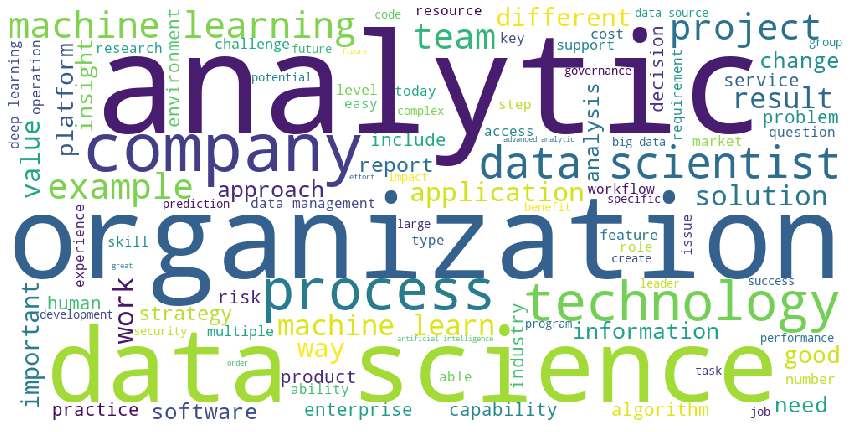

In [5]:
wcloud = wordcloud.WordCloud(width = 1000, height = 500, background_color='white', max_words=100, stopwords=stop_words).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wcloud)
plt.axis("off")
plt.show()

### LDA

In [6]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, min_df=0.06, max_df=0.7)
data_cvna = cvna.fit_transform(data.Whitepaper)

In [7]:
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data.index
data_dtmna.to_csv('Doc-Term-Matrix.csv', sep=';')
data_dtmna

,ability,abstraction,academic,accelerate,acceleration,acceptable,acceptance,accessibility,accessible,accident,...,worth,wrangle,write,wrong,yes,yield,youll,young,youve,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,5,2,2,1,0,2,0,1,1,0,...,0,0,0,0,4,1,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
151,6,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,4,0,4,0
152,10,0,1,0,0,1,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0


In [8]:
data_dtmna.sum(axis=0).sort_values(ascending=False)

production       680
cloud            673
governance       635
human            627
feature          619
                ... 
revolutionize     10
enhancement       10
imagine           10
overarch          10
mandate           10
Length: 1876, dtype: int64

In [9]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [10]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10, random_state=2)
ldana.print_topics()

[(0,
  '0.011*"hierarchy" + 0.007*"error" + 0.007*"iot" + 0.007*"cloud" + 0.006*"governance" + 0.006*"anomaly" + 0.006*"validation" + 0.006*"point" + 0.006*"reference" + 0.005*"multiple"'),
 (1,
  '0.012*"cloud" + 0.012*"architecture" + 0.009*"stream" + 0.009*"query" + 0.009*"lake" + 0.008*"cost" + 0.008*"integration" + 0.007*"big" + 0.006*"processing" + 0.006*"code"'),
 (2,
  '0.014*"feature" + 0.013*"deep" + 0.010*"human" + 0.010*"algorithm" + 0.008*"image" + 0.007*"network" + 0.007*"prediction" + 0.006*"production" + 0.006*"task" + 0.006*"training"'),
 (3,
  '0.007*"strategy" + 0.007*"research" + 0.006*"governance" + 0.006*"report" + 0.006*"group" + 0.005*"practice" + 0.005*"survey" + 0.005*"success" + 0.005*"skill" + 0.005*"leader"')]

In [11]:
topic_number=[]
topic_words=[]
# Get main topic in each document
for i, row_list in enumerate(ldana[corpusna]):
    row = row_list[0] if ldana.per_word_topics else row_list            
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    #print(row)
    topic_number.append(row[0][0])
    topic_words.append(ldana.show_topic(row[0][0]))

In [12]:
data['LDA_topic_number']=topic_number
data['LDA_topic_keywords']=topic_words

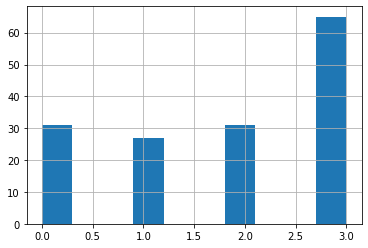

In [13]:
data.LDA_topic_number.hist()
plt.show()

In [14]:
data[['Article_Title','LDA_topic_number']].to_csv('output.csv', sep=';')

### LDA 
On introduction chapter

In [15]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words)
data_cvna = cvna.fit_transform(data.Article_Title)

In [16]:
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data.index
data_dtmna.to_csv('Doc-Term-Matrix.csv', sep=';')
data_dtmna

,10,2019,2020,accelerate,accelerates,accelerating,access,action,actionable,addressing,...,virtualization,vision,way,ways,web,wide,win,work,works,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data_dtmna.sum(axis=0).sort_values(ascending=False)

ai              39
learning        26
science         20
intelligence    17
enterprise      13
                ..
nlp              1
non              1
nurturing        1
objective        1
10               1
Length: 465, dtype: int64

In [18]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [19]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=50, random_state=69)
ldana.print_topics()

[(0,
  '0.035*"science" + 0.027*"ai" + 0.015*"maturity" + 0.015*"intelligence" + 0.011*"cases" + 0.008*"organization" + 0.008*"future" + 0.008*"started" + 0.008*"drive" + 0.008*"self"'),
 (1,
  '0.028*"management" + 0.025*"intelligence" + 0.021*"ai" + 0.020*"learning" + 0.018*"artificial" + 0.015*"build" + 0.015*"building" + 0.014*"science" + 0.011*"organization" + 0.008*"age"'),
 (2,
  '0.046*"ai" + 0.011*"introduction" + 0.011*"advanced" + 0.011*"projects" + 0.011*"intelligence" + 0.011*"strategy" + 0.011*"learning" + 0.008*"governance" + 0.008*"big" + 0.008*"streaming"'),
 (3,
  '0.042*"learning" + 0.030*"ai" + 0.024*"enterprise" + 0.015*"science" + 0.015*"guide" + 0.015*"deep" + 0.010*"architecture" + 0.010*"cloud" + 0.010*"challenges" + 0.008*"intelligence"')]

In [20]:
topic_number=[]
topic_words=[]
# Get main topic in each document
for i, row_list in enumerate(ldana[corpusna]):
    row = row_list[0] if ldana.per_word_topics else row_list            
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    #print(row)
    topic_number.append(row[0][0])
    topic_words.append(ldana.show_topic(row[0][0]))

In [21]:
data['LDA_topic_number']=topic_number
data['LDA_topic_keywords']=topic_words

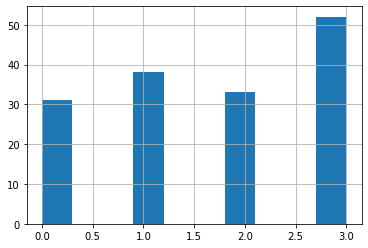

In [22]:
data.LDA_topic_number.hist()
plt.show()

### LSA

In [23]:
dictionary = corpora.Dictionary(data.Tokenized_Whitepaper)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data.Tokenized_Whitepaper]

In [24]:
def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

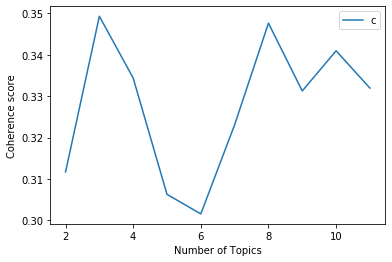

In [25]:
start,stop,step=2,12,1
number_of_topics=10
plot_graph(data.Tokenized_Whitepaper,start,stop,step)

In [26]:
text_list=[]
for text in data.Tokenized_Whitepaper:
    intermediate_text=[]
    for word in text:
        if word in stop_words:
            continue
        else:
            intermediate_text.append(word)
    text_list.append(intermediate_text)

In [27]:
# LSA Model
number_of_topics=3
words=10
clean_text=text_list
lsa_model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '-0.323*"organization" + -0.225*"technology" + -0.195*"value" + -0.195*"company" + -0.163*"project" + -0.162*"management" + -0.147*"learning" + -0.142*"process" + -0.135*"platform" + -0.126*"team"'), (1, '-0.369*"company" + -0.221*"human" + 0.217*"cloud" + 0.210*"platform" + 0.192*"management" + 0.163*"integration" + 0.158*"requirement" + 0.149*"advanced" + 0.139*"source" + 0.137*"report"'), (2, '0.384*"value" + 0.319*"organization" + 0.248*"project" + 0.214*"research" + -0.211*"science" + -0.201*"platform" + -0.196*"learning" + 0.185*"participant" + -0.136*"feature" + -0.135*"learn"')]


In [29]:
topic_number=[]
topic_words=[]
# Get main topic in each document
for i, row_list in enumerate(lsa_model[doc_term_matrix]):         
    row = sorted(row_list, key=lambda x: (x[1]), reverse=True)
    #print(row[0][0])
    topic_number.append(row[0][0])
    topic_words.append(lsa_model.show_topic(row[0][0]))

data['LSA_Topic_Number']=topic_number
data['LSA_Topic_Keywords']=topic_words

Text(0, 0.5, '# of Documents')

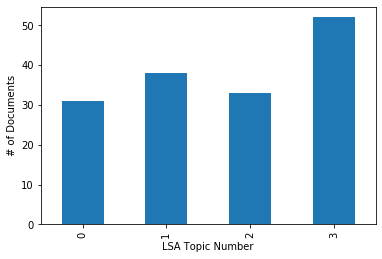

In [30]:
ax = data.groupby(['LDA_topic_number']).agg(['count']).iloc[:,0].plot.bar()
ax.set_xlabel("LSA Topic Number")
ax.set_ylabel("# of Documents")

Text(0, 0.5, '# of Documents')

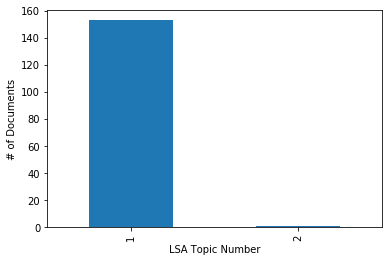

In [31]:
ax = data.groupby(['LSA_Topic_Number']).agg(['count']).iloc[:,0].plot.bar()
ax.set_xlabel("LSA Topic Number")
ax.set_ylabel("# of Documents")

### Guided LDA

In [32]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, min_df=0.06, max_df=0.7)
data_cvna = cvna.fit_transform(data.Whitepaper)

In [33]:
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data.index
data_dtmna.to_csv('Doc-Term-Matrix.csv', sep=';')
data_dtmna

,ability,abstraction,academic,accelerate,acceleration,acceptable,acceptance,accessibility,accessible,accident,...,worth,wrangle,write,wrong,yes,yield,youll,young,youve,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,5,2,2,1,0,2,0,1,1,0,...,0,0,0,0,4,1,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
151,6,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,4,0,4,0
152,10,0,1,0,0,1,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0


In [34]:
# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())
#invert mapping
inv_map = {v: k for k, v in id2wordna.items()}
vocab=list(inv_map.keys())

In [35]:
seed_topic_list=[['cloud', 'stream', 'architecture', 'virtualization', 'lake', 'query', 'iot', 'event','realtime','algorithm', 'feature','deep', 'layer','prediction', 'bias','code'],
                 ['structure', 'resource','role','function','training','talent','skill'],
                 ['finance','strategy','goal','vision','executive', 'performance','commitment','making'],
                 ['governance', 'ethic','responsibility', 'accountability','regulatory','security'],
                 ['hardware','integration']]
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[inv_map[word]] = t_id

In [36]:
data_dtmna.shape

(154, 1876)

In [38]:
model = glda.GuidedLDA(n_topics=5, n_iter=100, random_state=7, refresh=20)
model.fit(data_cvna, seed_topics=seed_topics, seed_confidence=0.15)

INFO:lda:n_documents: 154
INFO:lda:vocab_size: 1876
INFO:lda:n_words: 141623
INFO:lda:n_topics: 5
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -1271744
INFO:lda:<20> log likelihood: -1067330
INFO:lda:<40> log likelihood: -1050037
INFO:lda:<60> log likelihood: -1044603
INFO:lda:<80> log likelihood: -1040910
INFO:lda:<99> log likelihood: -1038363


In [39]:
n_top_words = 5
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: reader produce equipment count april
Topic 1: list objective organizational commerce replace
Topic 2: theyre augmented big autonomous restriction
Topic 3: wrong insurance expectation contributor error
Topic 4: near computer build functionality area
